In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import mglearn
import scipy as sp

In [2]:
from sklearn.model_selection import train_test_split

<h1>Classification graph example</h1>

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


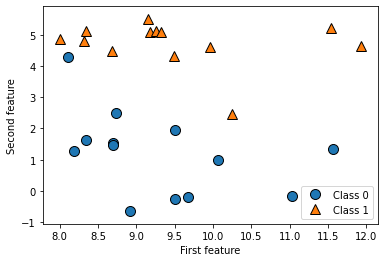

In [2]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

<h1>Regression graph example</h1>

Text(0, 0.5, 'Target')

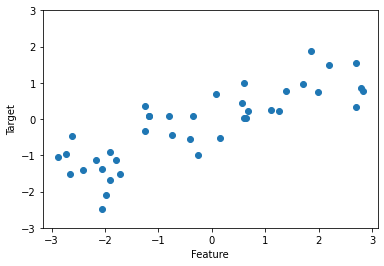

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

<h1>Cancer dataset</h1>

In [26]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [6]:
print("Sample counts per class: \n{}".format(
        {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class: 
{'malignant': 212, 'benign': 357}


In [7]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


<h1>Boston Houses Dataset</h1>

In [14]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [9]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [10]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


<h3>Extend features in the dataset</h3>
<p>Before, features were 13, now they have been increased to 105</p>
<p>The resulting 104 features are the 13 original features together with the 91 possible
combinations of two features within those 13</p>

In [11]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


<h1><font color="yellow">K-NEAREST NEIGHBORS<font></h1>

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


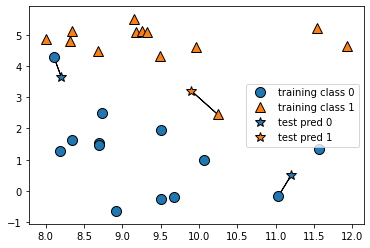

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


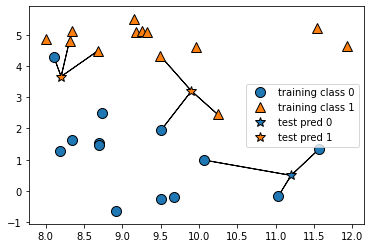

In [18]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

<h1>how we can apply the k-nearest neighbors algorithm using scikitlearn.</h1>

In [6]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


<p><font color="yellow">Next, we import and instantiate the class. This is when we can set parameters, like the
number of neighbors to use. Here, we set it to 3:<font></p>

In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

<p><font color="yellow">Now, we fit the classifier using the training set.<font></p>

In [24]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

<p><font color="yellow">To make predictions on the test data, we call the predict method.<font></p>

In [25]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


<p><font color="yellow">To evaluate how well our model generalizes, we can call the score method with the
test data together with the test labels<font></p>

In [26]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


In [27]:
%matplotlib inline

<h1><font color="yellow">Analyzing KNeighborsClassifier<font></h1>

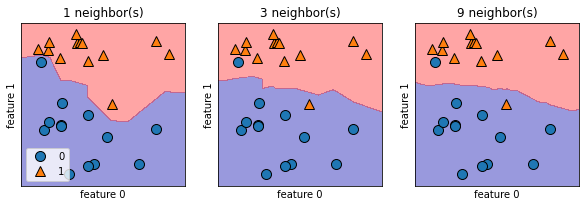

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
 # the fit method returns the object self, so we can instantiate
 # and fit in one line
 clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{} neighbor(s)".format(n_neighbors))
 ax.set_xlabel("feature 0")
 ax.set_ylabel("feature 1")
axes[0].legend(loc=3)


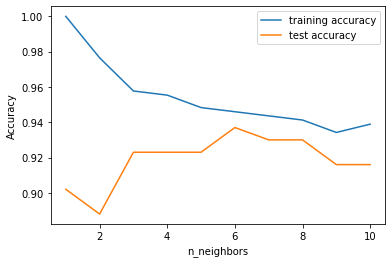

In [29]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
 # build the model
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # record training set accuracy
 training_accuracy.append(clf.score(X_train, y_train))
 # record generalization accuracy
 test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

<h1><font color="yellow">K-NN Regression<font></h1>

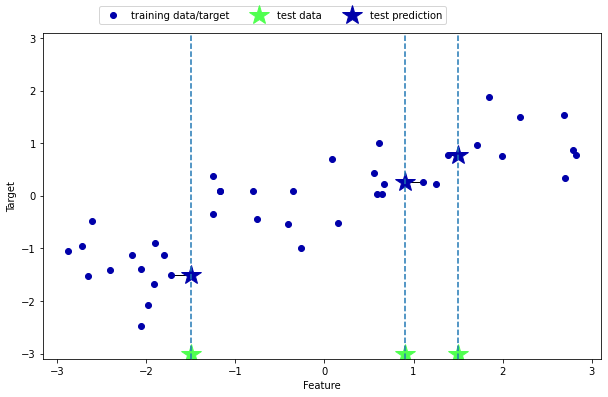

In [32]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

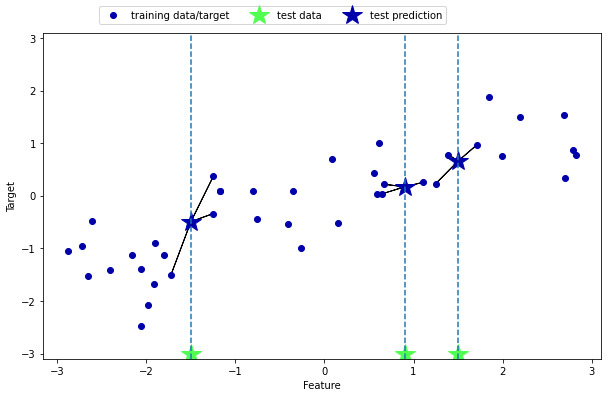

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

<p><font color="yellow"> k-nearest neighbors algorithm for regression is implementation<font></p>

In [34]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [36]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))


Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


<p><font color="yellow"> We can also evaluate the model using the score method, which for regressors returns
the R^2 score.<font></p>

In [38]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


<h1><font color="yellow">Analyzing KNeighborsRegressor<font></h1>

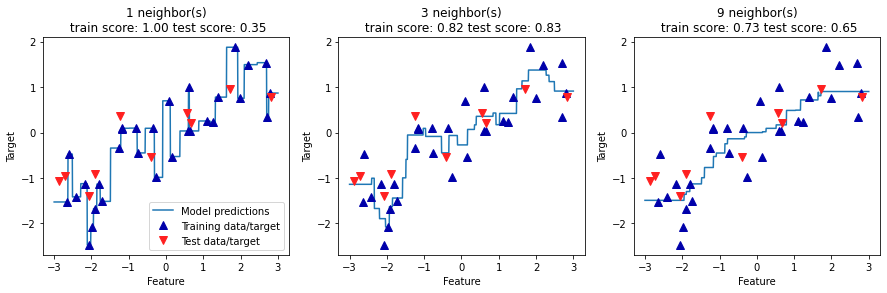

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
 # make predictions using 1, 3, or 9 neighbors
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
 ax.set_title(
 "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("Feature")
 ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
 "Test data/target"], loc="best")

<h1><font color="red">K-Nearest Neighbors Completed<font></h1>

<h1><font color="yellow">LINEAR MODELS<font></h1>

<h2><font color="yellow">Linear Regression<font></h2>

w[0]: 0.393906  b: -0.031804


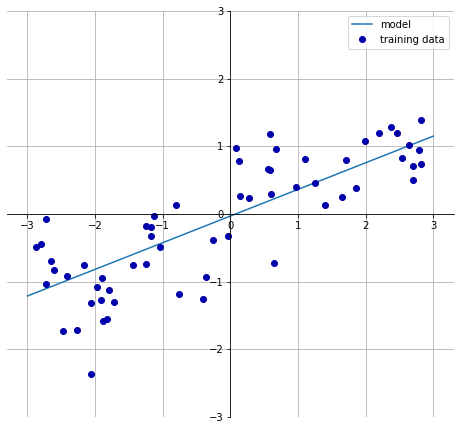

In [19]:
mglearn.plots.plot_linear_regression_wave()

In [20]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [21]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [22]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


<p><font color="yellow"> Linear regression on bigger data (boston housing)<font></p>

<p><font color="yellow">First, we load
the dataset and split it into a training and a test set. Then we build the linear regression model <font></p>

In [24]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


<h2><font color="yellow">Ridge Regression<font></h2>

In [25]:
from sklearn.linear_model import Ridge

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
ridge = Ridge().fit(X_train, y_train)

In [28]:
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


<p><font color="yellow">As you can see, the training set score of Ridge is lower than for LinearRegression,
while the test set score is higher.<font></p>

In [29]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)

In [30]:
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


<p><font color="yellow">Increasing alpha forces coefficients to move more toward zero, which decreases
training set performance but might help generalization<font></p>

In [31]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

In [32]:

print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


<p><font color="yellow">For very small values of alpha, coefficients are barely restricted at all,
and we end up with a model that resembles LinearRegression:<font></p>

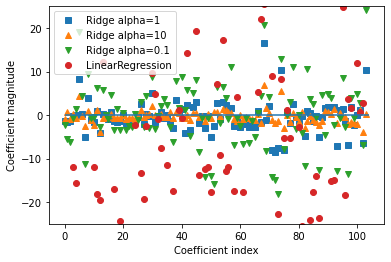

In [33]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

<h2><font color="yellow">Lasso Regression<font></h2>

In [35]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


<p><font color="yellow">As you can see, Lasso does quite badly, both on the training and the test set. This
indicates that we are underfitting, and we find that it used only 4 of the 105 features.
<font></p>

<p><font color="yellow">To reduce underfitting, let’s try decreasing alpha. When we
do this, we also need to increase the default setting of max_iter (the maximum num‐
ber of iterations to run):<font></p>

In [36]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


<p><font color="yellow">If we set alpha too low, however, we again remove the effect of regularization and end
up overfitting, with a result similar to LinearRegression:<font></p>

In [37]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

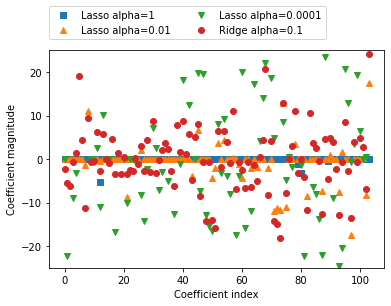

In [38]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

<p><font color="yellow">The Ridge model with alpha=0.1 has similar
predictive performance as the lasso model with alpha=0.01, but using Ridge, all coef‐
ficients are nonzero</p>

<p><font color="yellow">In practice, ridge regression is usually the first choice between these two models.
However, if you have a large amount of features and expect only a few of them to be
important, Lasso might be a better choice. Similarly, if you would like to have a
model that is easy to interpret, Lasso will provide a model that is easier to under‐
stand, as it will select only a subset of the input features. <font></p>

<h2><font color="yellow">Linear models for classification<font></h2>

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [3]:
X, y = mglearn.datasets.make_forge()

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


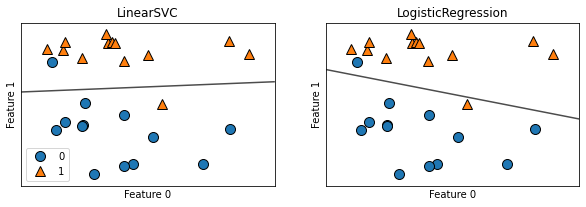

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
 clf = model.fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
 ax=ax, alpha=.7)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{}".format(clf.__class__.__name__))
 ax.set_xlabel("Feature 0")
 ax.set_ylabel("Feature 1")
axes[0].legend()

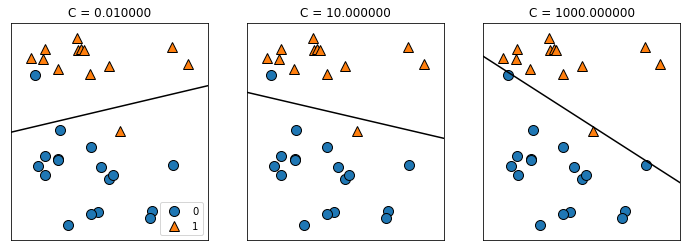

In [7]:
mglearn.plots.plot_linear_svc_regularization()

<h2><font color="yellow">Analyze LinearLogistic more<font></h2>

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [13]:
logreg = LogisticRegression().fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.944


<p><font color="yellow">The default value of soft margin C=1 provides quite good performance, with 95% accuracy on
both the training and the test set. But as training and test set performance are very
close, it is likely that we are underfitting. Let’s try to increase C to fit a more flexible
model:
 <font></p>

In [15]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.958


<p><font color="yellow">Using C=100 results in higher training set accuracy, and also a slightly increased test
set accuracy, confirming our intuition that a more complex model should perform
better<font></p>

<p><font color="yellow">We can also investigate what happens if we use an even more regularized model than
the default of C=1, by setting C=0.01:
<font></p>

In [27]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


<p><font color="yellow">Finally, let’s look at the coefficients learned by the models with the three different set‐
tings of the regularization parameter C<font></p>

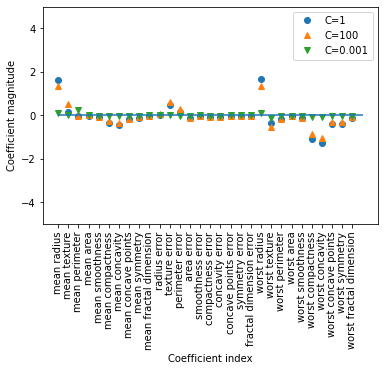

In [29]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

<p><font color="yellow">If we desire a more interpretable model, using L1 regularization might help, as it lim‐
its the model to using only a few features. Here is the coefficient plot and classifica‐
tion accuracies for L1 regularization<font></p>

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


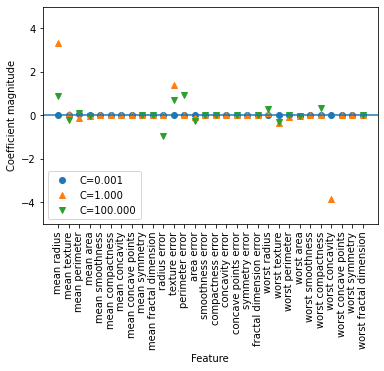

In [31]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

<p><font color="yellow">As you can see, there are many parallels between linear models for binary classifica‐
tion and linear models for regression. As in regression, the main difference between
the models is the penalty parameter, which influences the regularization and
whether the model will use all available features or select only a subset.
<font></p>

<h1><font color="yellow">one-vs.-rest method<font></h1>

<p><font color="yellow">Let’s apply the one-vs.-rest method to a simple three-class classification dataset. We
use a two-dimensional dataset, where each class is given by data sampled from a
Gaussian distribution<font></p>

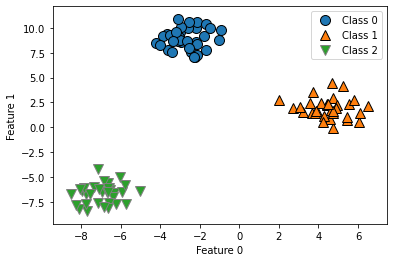

In [32]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

<p><font color="yellow">Now, we train a LinearSVC classifier on the dataset:<font></p>

In [34]:
linear_svm = LinearSVC().fit(X, y)

In [35]:
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


<p><font color="yellow">We see that the shape of the coef_ is (3, 2), meaning that each row of coef_ con‐
tains the coefficient vector for one of the three classes and each column holds the
coefficient value for a specific feature (there are two in this dataset). The intercept_
is now a one-dimensional array, storing the intercepts for each class.<font></p>

<p><font color="yellow">Let’s visualize the lines given by the three binary classifiers<font></p>

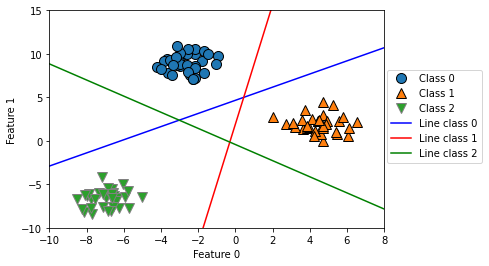

In [36]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
 plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
 'Line class 2'], loc=(1.01, 0.3))

<p><font color="yellow">The following example shows the predictions for all regions of the 2D
space:<font></p>

Text(0, 0.5, 'Feature 1')

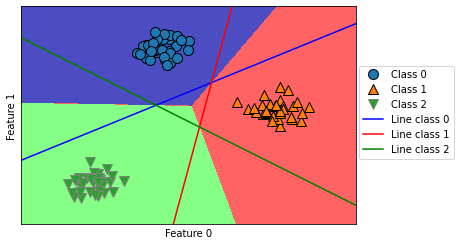

In [37]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
 plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

<h1><font color="red">Linear Models Completed<font></h1>

<h1><font color="yellow">Naive Bayes Classifiers<font></h1>

In [3]:
X = np.array([[0, 1, 0, 1],
 [1, 0, 1, 1],
 [0, 0, 0, 1],
 [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

<p><font color="yellow"> Counting the nonzero entries per class<font></p>

In [4]:
counts = {}
for label in np.unique(y):
 # iterate over each class
 # count (sum) entries of 1 per feature
 counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


<h1><font color="red">Naive Bayes Completed<font></h1>

<h1><font color="yellow">Desicion Trees<font></h1>

In [11]:
import sys
sys.path

['C:\\Users\\hp\\Documents\\Software Development\\Python\\Intro to ML with Python',
 'C:\\Users\\hp\\anaconda3\\python39.zip',
 'C:\\Users\\hp\\anaconda3\\DLLs',
 'C:\\Users\\hp\\anaconda3\\lib',
 'C:\\Users\\hp\\anaconda3',
 '',
 'C:\\Users\\hp\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'C:\\Users\\hp\\anaconda3\\lib\\site-packages',
 'C:\\Users\\hp\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\hp\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\hp\\anaconda3\\lib\\site-packages\\Pythonwin']

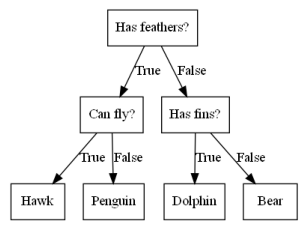

In [15]:
mglearn.plots.plot_animal_tree()

<h2><font color="yellow">Building decision trees<font></h2>

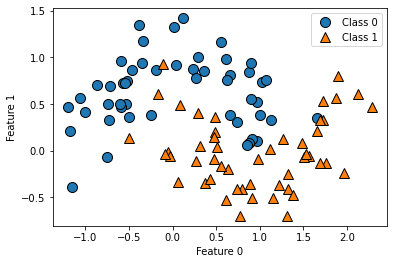

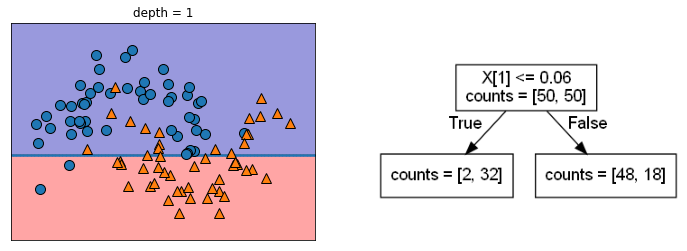

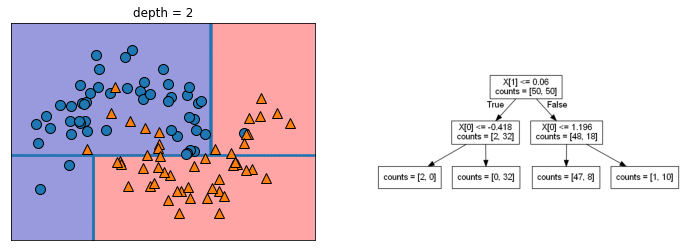

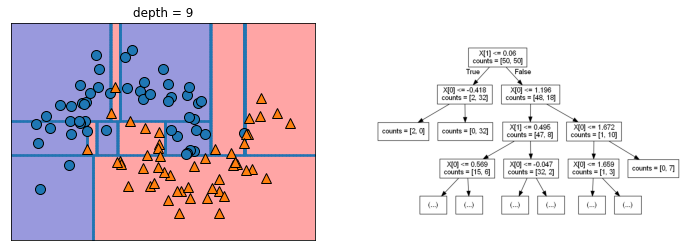

In [16]:
mglearn.plots.plot_tree_progressive()

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [6]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [7]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
 feature_names=cancer.feature_names, impurity=False, filled=True)

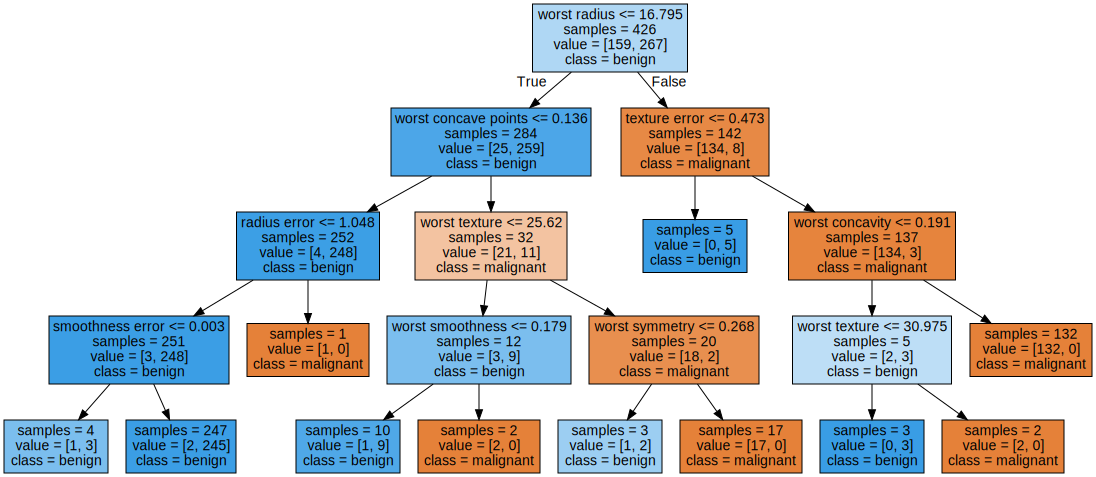

In [8]:
import graphviz
with open("tree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)

In [11]:
print(f"Feature Inportances: \n {tree.feature_importances_}")

Feature Inportances: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


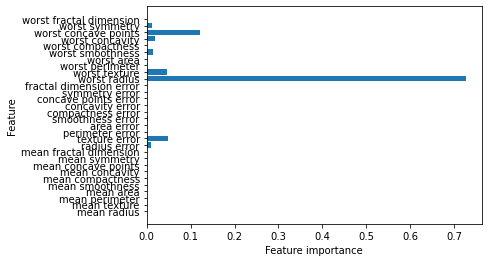

In [12]:
def plot_feature_importances_cancer(model):
 n_features = cancer.data.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), cancer.feature_names)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


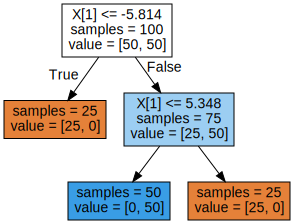

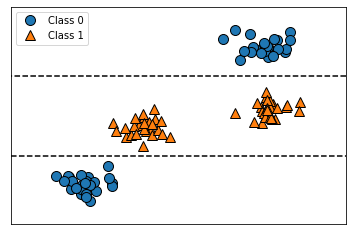

In [13]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

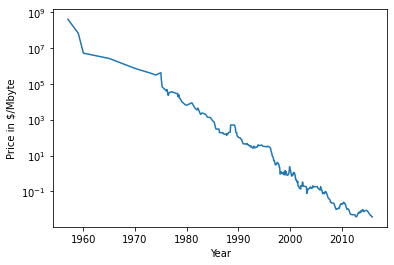

In [14]:
import pandas as pd
ram_prices = pd.read_csv("data/ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

<p><font color="yellow">We will make a forecast for the years after 2000 using the historical data up to that
point, with the date as our only feature. We will compare two simple models: a
DecisionTreeRegressor and LinearRegression. <font></p>

<p><font color="yellow">After training the models and making
predictions, we apply the exponential map to undo the logarithm transform. We
make predictions on the whole dataset for visualization purposes here, but for a
quantitative evaluation we would only consider the test dataset<font></p>

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
# predict on all data
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

C:\Users\hp\AppData\Local\Temp\ipykernel_13968\531484156.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
C:\Users\hp\AppData\Local\Temp\ipykernel_13968\531484156.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


<p><font color="yellow">created here, compares the predictions of the decision tree and the linear
regression model with the ground truth<font></p>

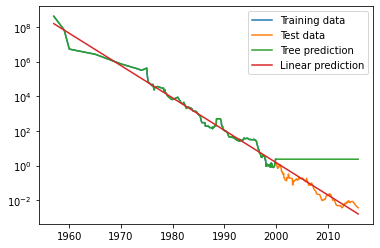

In [17]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

<h2><font color="yellow">Random Forests<font></h2>

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
 random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

<p><font color="yellow">The trees that are built as part of the random forest are stored in the estimator_
attribute. Let’s visualize the decision boundaries learned by each tree, together with
their aggregate prediction as made by the forest<font></p>

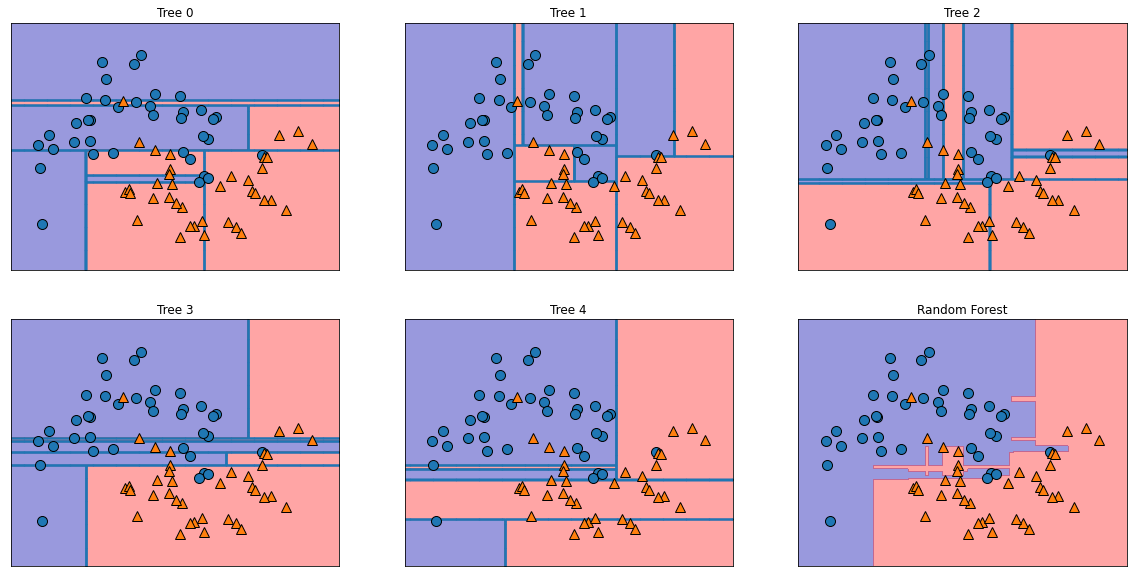

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
 ax.set_title("Tree {}".format(i))
 mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
 alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

<p><font color="yellow">As another example, let’s apply a random forest consisting of 100 trees on the Breast
Cancer dataset<font></p>

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


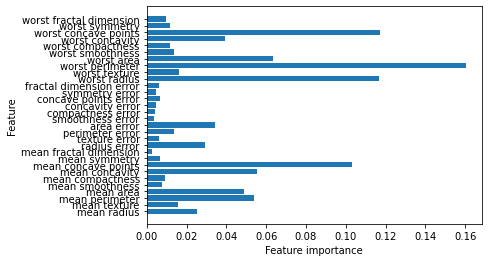

In [21]:
plot_feature_importances_cancer(forest)

<h2><font color="yellow">Gradient boosted regression trees<font></h2>

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [23]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [24]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


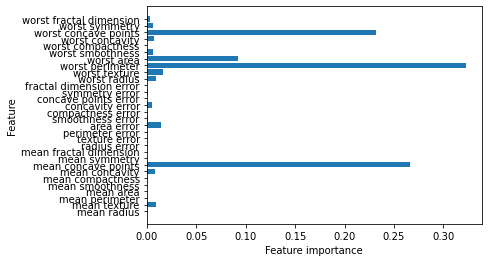

In [26]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

<h1><font color="red">Decision Trees End<font></h1>

<h1><font color="yellow">Neural Networks (Deep Learning)<font></h1>

A family of algorithms known as neural networks has recently seen a revival under
the name “deep learning.”

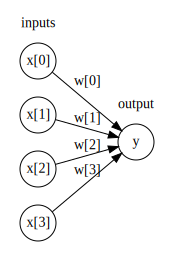

In [3]:
display(mglearn.plots.plot_logistic_regression_graph())

Here, each node on the left represents an input feature, the connecting lines represent
the learned coefficients, and the node on the right represents the output, which is a
weighted sum of the inputs.

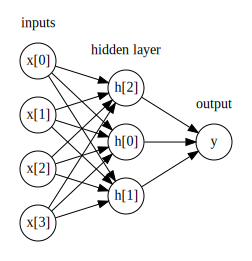

In [4]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

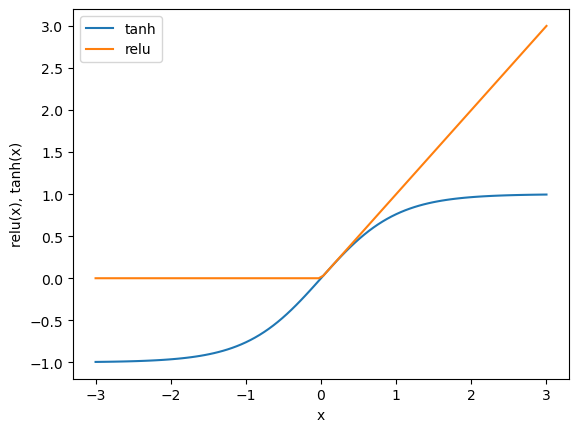

In [6]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

 It is also possible to add additional
hidden layers, as shown below

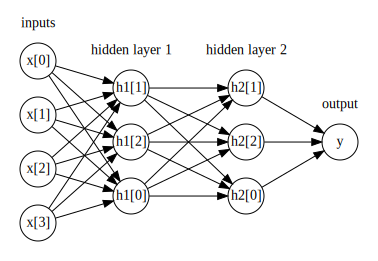

In [7]:
mglearn.plots.plot_two_hidden_layer_graph()

### Tuning neural networks

Let’s look into the workings of the MLP by applying the MLPClassifier to the
two_moons dataset we used earlier in this chapter. The results are shown 

Text(0, 0.5, 'Feature 1')

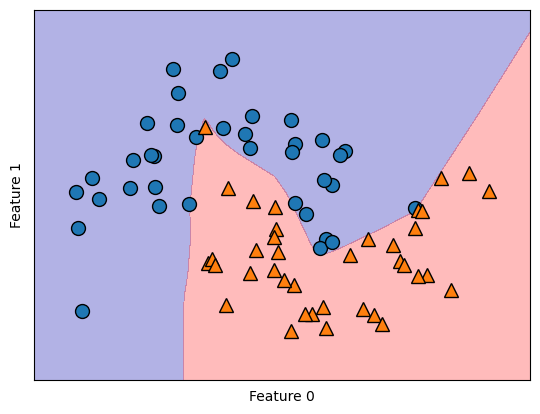

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
 random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

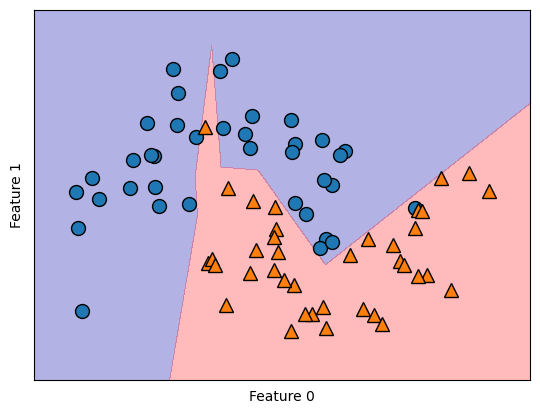

In [15]:
mlp = MLPClassifier(solver='lbfgs', max_iter=300, random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

using two hidden layers, with 10 units each

Text(0, 0.5, 'Feature 1')

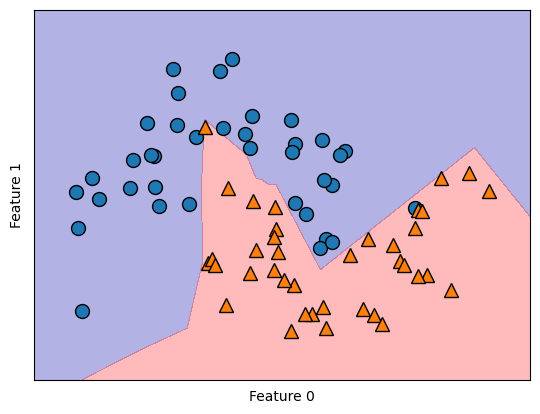

In [16]:

mlp = MLPClassifier(solver='lbfgs', random_state=0,
 hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

using two hidden layers, with 10 units each, now with tanh nonlinearity

Text(0, 0.5, 'Feature 1')

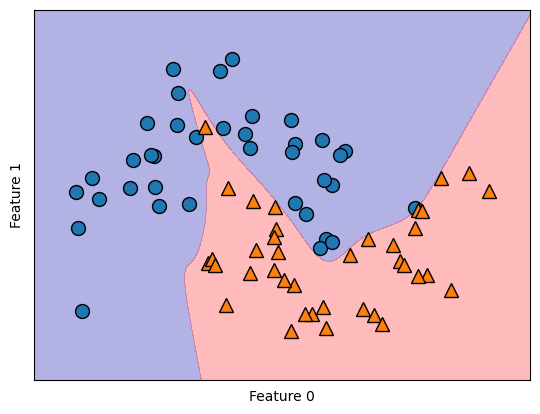

In [19]:
mlp = MLPClassifier(solver='lbfgs', max_iter=300, activation='tanh',
 random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Finally, we can also control the complexity of a neural network by using an l2 penalty
to shrink the weights toward zero, as we did in ridge regression and the linear classifi‐
ers. The parameter for this in the MLPClassifier is alpha (as in the linear regression
models), and it’s set to a very low value (little regularization) by default.

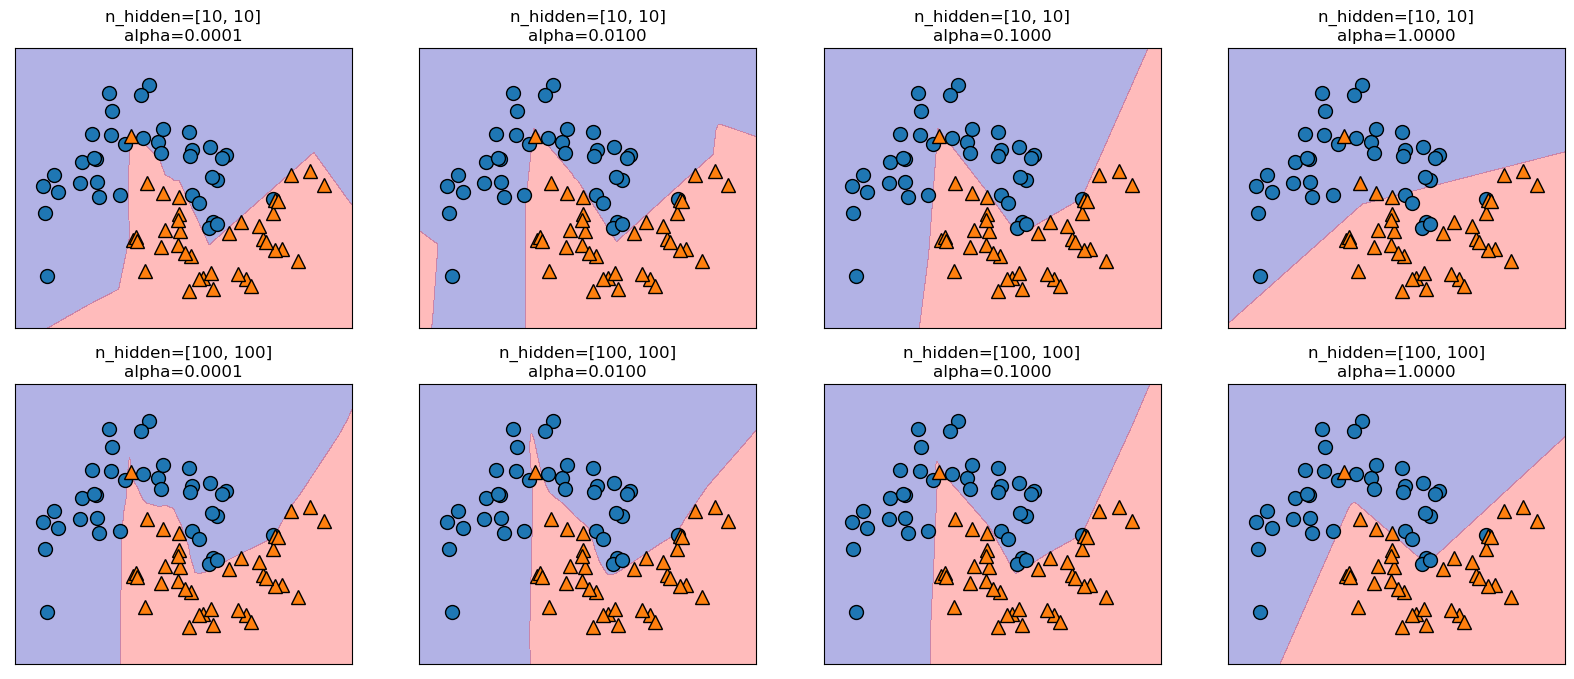

In [23]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
 for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
     mlp = MLPClassifier(solver='lbfgs', max_iter=1000, random_state=0,
         hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
         alpha=alpha)
     mlp.fit(X_train, y_train)
     mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
     mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
     ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
         n_hidden_nodes, n_hidden_nodes, alpha))

If the networks are
large, and their complexity is chosen properly, this should not affect accuracy too
much, but it is worth keeping in mind (particularly for smaller networks).
below shows plots of several models, all learned with the same settings of the
parameters:

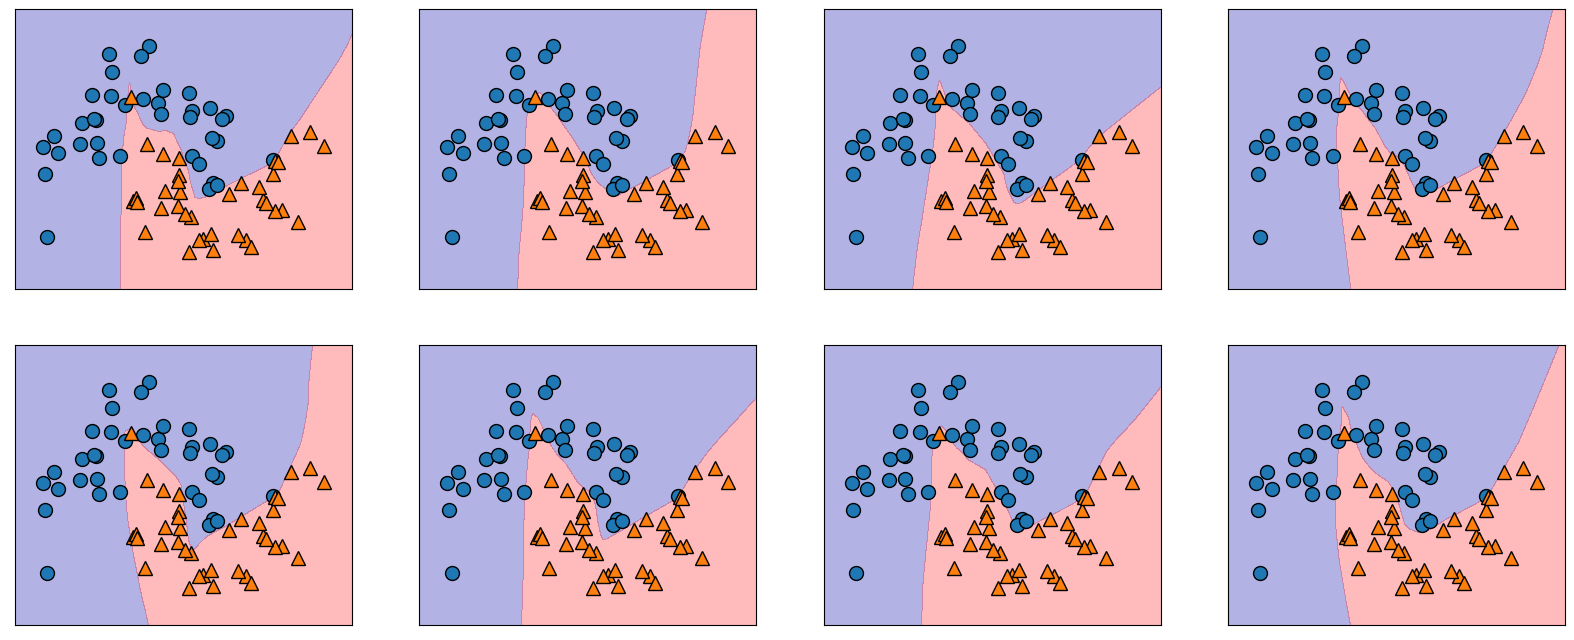

In [24]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
 mlp = MLPClassifier(solver='lbfgs', random_state=i,
 hidden_layer_sizes=[100, 100])
 mlp.fit(X_train, y_train)
 mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
 mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

To get a better understanding of neural networks on real-world data, let’s apply the
MLPClassifier to the Breast Cancer dataset. We start with the default parameters:

In [27]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


The accuracy of the MLP is quite good, but not as good as the other models. As in the
earlier SVC example, this is likely due to scaling of the data. Neural networks also
expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1

We must rescale our data so that it fulfills these requirements. Again,
we will do this by hand here, but we’ll introduce the StandardScaler to do this auto‐
matically in Chapter 3:

In [36]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0, max_iter=400)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


     As there is
    some gap between the training and the test performance, we might try to decrease the
    model’s complexity to get better generalization performance. Here, we choose to
    increase the alpha parameter (quite aggressively, from 0.0001 to 1) to add stronger
    regularization of the weights:

In [37]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


    While it is possible to analyze what a neural network has learned, this is usually much
    trickier than analyzing a linear model or a tree-based model. One way to introspect
    what was learned is to look at the weights in the model. 

The following plot shows the weights that
were learned connecting the input to the first hidden layer. The rows in this plot cor‐
respond to the 30 input features, while the columns correspond to the 100 hidden
units. Light colors represent large positive values, while dark colors represent nega‐
tive values:

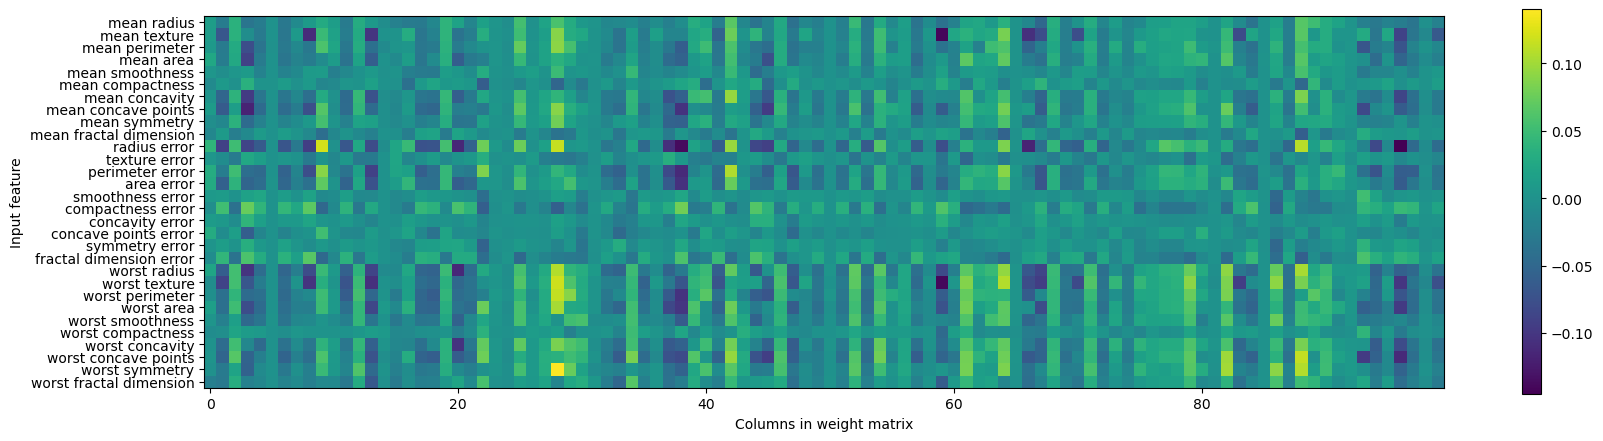

In [38]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()